# Lab1

## Artyom Iudin BVT2101

<div class="alert alert-block alert-info">
<b>Chapter navigation</b> isn't working on github. Download .ipynb to use it.

If it is still not working close tab with notebook and open it again.
</div>

# Chapters <a class="anchor" id="chapters"></a>
0. [Import](#import)
1. [Man/Woman](#man_woman)
2. [Price distribution](#price_dist)
3. [Median and Deviation for Fare](#med_dev_fare)
4. [Middle age and Old one](#mid_old_age)
5. [Woman vs Man](#woman_vs_man)
6. [Most popular male name](#male_name)
7. [Fare and Age distribution](#fare_age)
8. [Male/Female and Classes](#sex_classes)

# 0. [Import](#chapters) <a class="anchor" id="import"></a>

In [3]:
import pandas as pd
import seaborn as sns # for 7 task
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":", "ticks":True})

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../datasets/titanic_train.csv", index_col="PassengerId")
df.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
613,1,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.5000,NaN,Q
430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S
627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,NaN,Q
433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S
460,0,3,"O'Connor, Mr. Maurice",male,NaN,0,0,371060,7.7500,NaN,Q
467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S
681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q
404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,NaN,S


# 1. [Man/Woman](#chapters) <a class="anchor" id="man_woman"></a>

In [4]:
print(f"Threre were {df['Sex'].value_counts()['male']} male and \
{df['Sex'].value_counts()['female']} female on Titanic")

Threre were 577 male and 314 female on Titanic


# 2. [Pclass distribution](#chapters) <a class="anchor" id="price_dist"></a>

In [5]:
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [6]:
print(f"There were {pd.crosstab(df.Sex, df.Pclass).loc['male'][2]} men in 2 class")

There were 108 men in 2 class


# 3. [Median and Deviation of Fare](#chapters) <a class="anchor" id="med_dev_fare"></a>

In [7]:
print(f"Fare's median = {df.Fare.median():.2f}, and deviation = {df.Fare.std():.2f}")

Fare's median = 14.45, and deviation = 49.69


# 4. [Middle age vs old one](#chapters) <a class="anchor" id="mid_old_age"></a>

In [8]:
survived = df[df.Survived == 1]

if (len(survived[survived.Age < 30]) / len(df)) > (len(survived[survived.Age > 60]) / len(df)):
    print("Yes, it was true that people younger than 30 had more chances to survive")
else:
    print("No, it was a myth")
    
print(f"For younger than 30 chances to survive {len(survived[survived.Age < 30]) / len(df):.2f}")
print(f"For older than 60 - {len(survived[survived.Age > 60]) / len(df):.2f}")

Yes, it was true that people younger than 30 had more chances to survive
For younger than 30 chances to survive 0.18
For older than 60 - 0.01


# 5. [Woman vs Man](#chapters) <a class="anchor" id="woman_vs_man"></a>

In [9]:
if df.groupby('Sex').Survived.mean()['female'] > df.groupby('Sex').Survived.mean()['male']:
    print("It was true")
else:
    print("It was a myth")
    
print(f"Female chances = {df.groupby('Sex').Survived.mean()['female']:.2f},\
 male chances = {df.groupby('Sex').Survived.mean()['male']:.2f}")

It was true
Female chances = 0.74, male chances = 0.19


# 6. [Most popular male name](#chapters) <a class="anchor" id="male_name"></a>

In [10]:
print(f"Most popular male name = {df[df['Sex'] == 'male'].Name.mode()[0]}")

Most popular male name = Abbing, Mr. Anthony


# 7. [Fare and Age distribution](#chapters) <a class="anchor" id="fare_age"></a>

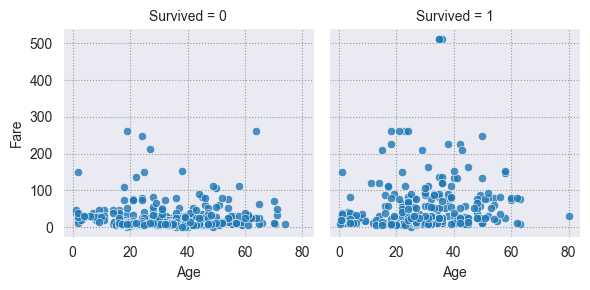

In [11]:
g = sns.FacetGrid(df, col="Survived")
g.map(sns.scatterplot, "Age", "Fare", alpha=0.8)

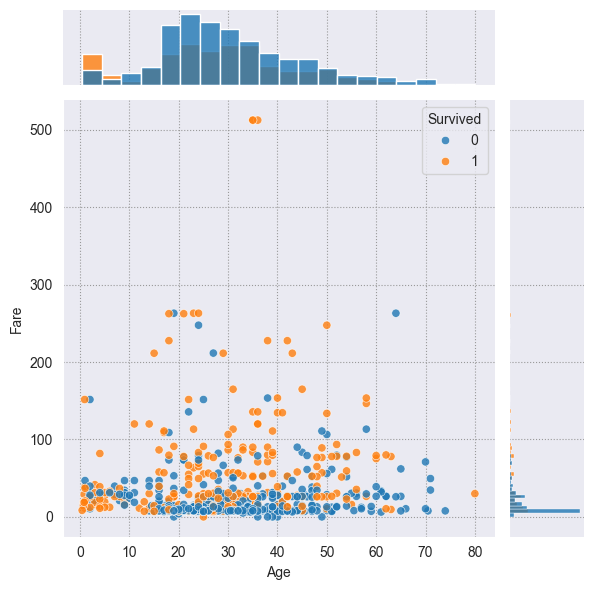

In [12]:
g = sns.JointGrid(data=df, x="Age", y="Fare", hue="Survived")
g.plot(sns.scatterplot, sns.histplot, alpha=0.8)

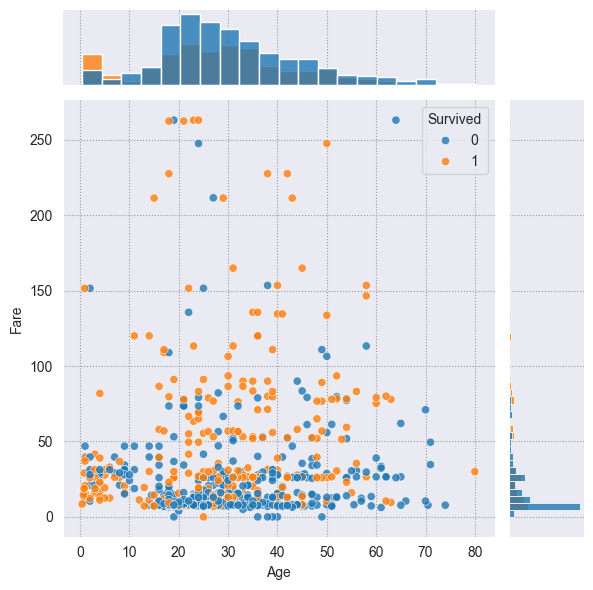

In [13]:
cutted_df = df[df['Fare'] < 300] # cutted the reach one
g = sns.JointGrid(data=cutted_df, x="Age", y="Fare", hue="Survived")
g.plot(sns.scatterplot, sns.histplot, alpha=0.8)

It's a rich man's world

In [14]:
ages = df.groupby('Survived').Age.mean()

if (ages[0] > ages[1]):
    print(f"Yes, survived were younger in mean, {ages[0]:.2f} vs {ages[1]:.2f}")
else:
    print(f"No, survived were older in mean, {ages[0]:.2f} vs {ages[1]:.2f}")

Yes, survived were younger in mean, 30.63 vs 28.34


# 8. [Male/Female and classes](#chapters) <a class="anchor" id="sex_classes"></a>

In [15]:
sex_classes = df.groupby(['Sex', 'Pclass']).Age.mean()
sex_classes

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [16]:
print(f"- {sex_classes.loc['male', 1] > 40} - \
mean male age for the 1 Class is more than 40")

print(f"- {sex_classes.loc['female', 1] > 40} - \
mean female age for the 1 Class is more than 40")

print("-",
    (sex_classes.loc['female', 1] < sex_classes.loc['male', 1] and
     sex_classes.loc['female', 2] < sex_classes.loc['male', 2] and
     sex_classes.loc['female', 3] < sex_classes.loc['male', 3]), 
     "- in all classes men are older than women")

print("-",
    ((sex_classes.loc['female', 1] + sex_classes.loc['male', 1]) > 
     (sex_classes.loc['female', 2] + sex_classes.loc['male', 2]) and
     (sex_classes.loc['female', 2] + sex_classes.loc['male', 2]) > 
     (sex_classes.loc['female', 3] + sex_classes.loc['male', 3])), 
     "- less class - more age")


- True - mean male age for the 1 Class is more than 40
- False - mean female age for the 1 Class is more than 40
- True - in all classes men are older than women
- True - less class - more age
